<a href="https://colab.research.google.com/github/25stu0613-dowon/opencv/blob/main/opencv_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프롬포트:opencv를 사용해서 인터넷에서 다운 받은 사진을 바탕화면에 저장했고 이 데이터를 입력 받아서 opencv로 이미지 인식이 되는걸 구글코랩에 실행하고 싶어 코드를 만들어줘

✅ 이미지 다운로드 및 로드 성공!
👀 감지된 얼굴 수: 1


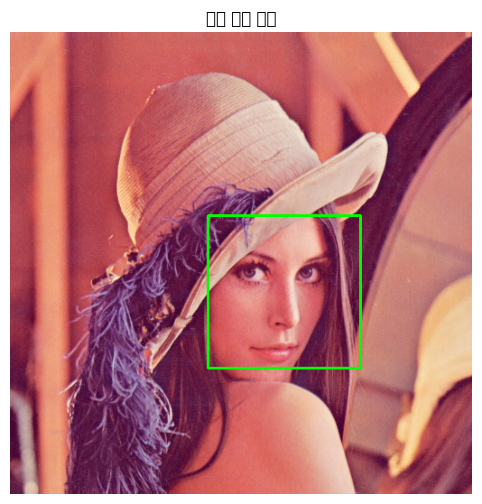

💾 인식된 이미지 저장 완료: /content/recognized_image.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# ✅ OpenCV로 인터넷 이미지 다운로드 → 얼굴 인식 → 결과 표시 및 다운로드

!pip install opencv-python requests matplotlib --quiet

import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 🔹 1. 이미지 URL (원하는 이미지로 변경 가능)
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"

# 🔹 2. 이미지 다운로드 및 로드
response = requests.get(image_url)
if response.status_code == 200:
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    print("✅ 이미지 다운로드 및 로드 성공!")
else:
    raise Exception("❌ 이미지 다운로드 실패! URL을 확인하세요.")

# 🔹 3. 얼굴 인식 처리
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
print(f"👀 감지된 얼굴 수: {len(faces)}")

# 🔹 4. 얼굴 영역에 사각형 표시
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 🔹 5. 결과 이미지 출력
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("얼굴 인식 결과")
plt.show()

# 🔹 6. 이미지 저장 및 다운로드
save_path = "/content/recognized_image.jpg"
cv2.imwrite(save_path, image)
print("💾 인식된 이미지 저장 완료:", save_path)
files.download(save_path)
